<a href="https://colab.research.google.com/github/drcfsorg/Pokhara_ML_Bootcamp/blob/master/model_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/amit-timalsina/model-validation-tutorial/master/datasets/winequality-red.csv winequality.csv

--2023-05-31 13:38:42--  https://raw.githubusercontent.com/amit-timalsina/model-validation-tutorial/master/datasets/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.007s  

2023-05-31 13:38:42 (13.8 MB/s) - ‘winequality-red.csv’ saved [100951/100951]

--2023-05-31 13:38:42--  http://winequality.csv/
Resolving winequality.csv (winequality.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘winequality.csv’
FINISHED --2023-05-31 13:38:42--
Total wall clock time: 0.3s
Downloaded: 1 files, 99K in 0.007s (13.8 MB/s)


In [4]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
  3: 0,
  4: 1,
  5: 2,
  6: 3,
  7: 4,
  8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df.sample(frac=1).reset_index(drop=True, inplace=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 rows are selected for testing/validation
df_test = df.tail(599)

In [9]:
# import from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# intialize decision tree classifier
# with a max_depth of 3
clf = DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = df_train.columns.drop("quality")

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [10]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on the training data set
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [11]:
train_accuracy

0.58

In [12]:
test_accuracy

0.5442404006677797

In [13]:
# intialize decision tree classifier
# with a max_depth of 3
clf = DecisionTreeClassifier(max_depth=7)

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on the training data set
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [14]:
train_accuracy, test_accuracy

(0.794, 0.49081803005008345)

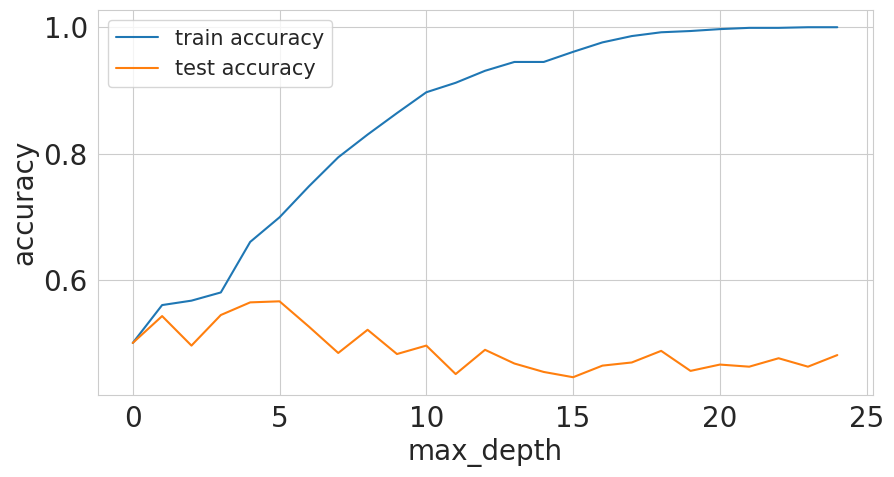

In [15]:
# import matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = DecisionTreeClassifier(max_depth=depth)

    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )

    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create two plots using matplotlib adn seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [16]:
from sklearn import model_selection

In [17]:
df_0 = df.copy()

In [18]:
df_0.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [19]:
# We create a new column called kfold and fill it with -1
df_0["kfold"] = -1

# the next step is to randomize the rows of the data
df_0 = df_0.sample(frac=1).reset_index(drop=True)

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df_0)):
    df_0.loc[val_, "kfold"] = fold

In [20]:
df_0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,2,0
1,7.2,0.620,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8,3,0
2,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,2,0
3,7.4,0.530,0.26,2.0,0.101,16.0,72.0,0.99570,3.15,0.57,9.4,2,0
4,6.4,0.790,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8,2,4
1595,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,9.6,3,4
1596,7.4,0.640,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,2,4
1597,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,5,4


Text(0, 0.5, 'count')

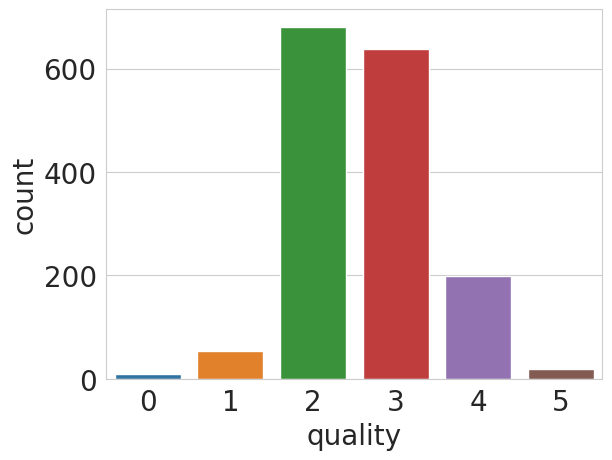

In [21]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [22]:
train_fold_0 = df_0.loc[df_0["kfold"] != 0]
val_fold_0 = df_0.loc[df_0["kfold"] == 0]


Text(0, 0.5, 'count')

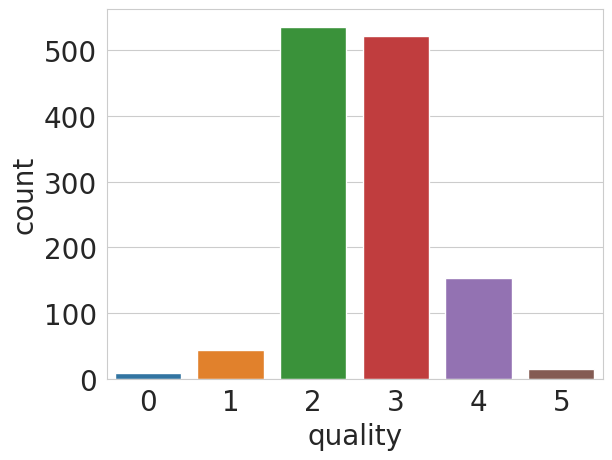

In [23]:
b = sns.countplot(x='quality', data=train_fold_0)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

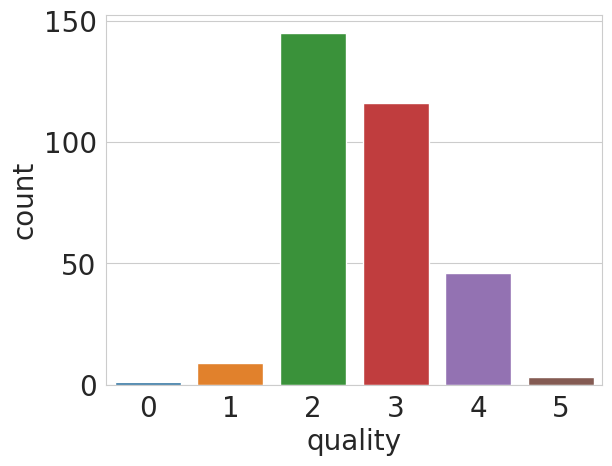

In [24]:
b = sns.countplot(x='quality', data=val_fold_0)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [25]:
df_1 = df.copy()

In [26]:
# We create a new column called kfold and fill it with -1
df_1["kfold"] = -1

# the next step is to randomize the rows of the data
df_1 = df.sample(frac=1).reset_index(drop=True)

# fetch targets
y = df_1.quality.values

# initiate the StratifiedKFold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df_1, y=y)):
    df_1.loc[val_, "kfold"] = fold

In [28]:
df_1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.1,0.430,0.17,1.80,0.082,27.0,51.0,0.99634,3.49,0.64,10.4,2,0.0
1,8.6,0.520,0.38,1.50,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,2,0.0
2,6.8,0.650,0.02,2.10,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,3,0.0
3,7.6,0.430,0.29,2.10,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,2,0.0
4,11.9,0.400,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.3,0.760,0.29,4.20,0.075,12.0,16.0,0.99650,3.45,0.68,11.5,3,4.0
1595,7.4,0.530,0.26,2.00,0.101,16.0,72.0,0.99570,3.15,0.57,9.4,2,4.0
1596,9.8,0.300,0.39,1.70,0.062,3.0,9.0,0.99480,3.14,0.57,11.5,4,4.0
1597,7.8,0.560,0.19,2.00,0.081,17.0,108.0,0.99620,3.32,0.54,9.5,2,4.0


Text(0, 0.5, 'count')

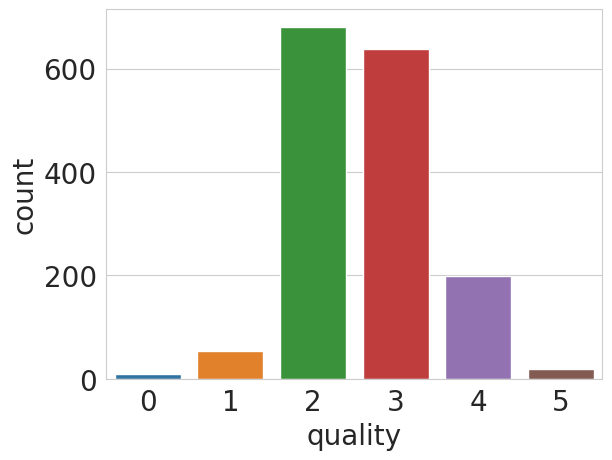

In [27]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [29]:
train_fold_0 = df_1.loc[df_1["kfold"] != 0]
val_fold_0 = df_1.loc[df_1["kfold"] == 0]


Text(0, 0.5, 'count')

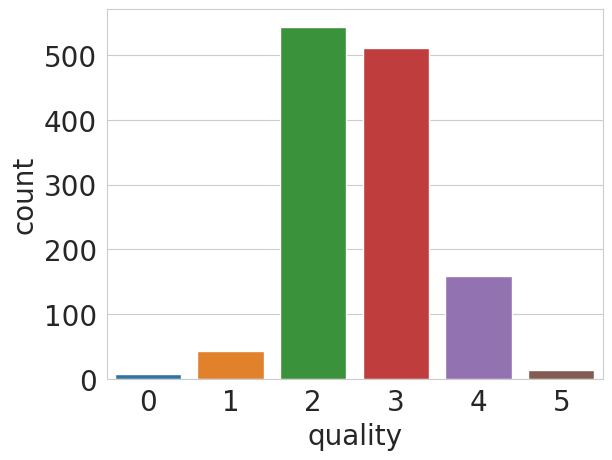

In [30]:
b = sns.countplot(x='quality', data=train_fold_0)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

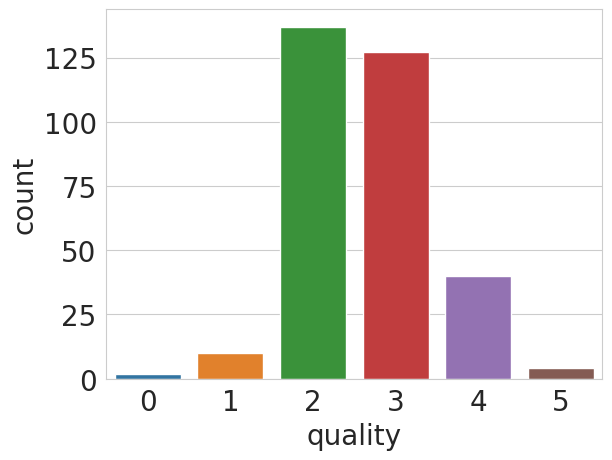

In [31]:
b = sns.countplot(x='quality', data=val_fold_0)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

# Evaluation metric

In [32]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
        # return accuracy
        # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [33]:
from sklearn import metrics

l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

metrics.accuracy_score(l1, l2)

0.5

In [34]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [35]:
l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

In [36]:
true_positive(l1, l2)

2

In [37]:
false_positive(l1, l2)

2

In [38]:
false_negative(l1, l2)

1

In [39]:
true_negative(l1, l2)

1

In [40]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [41]:
l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

In [42]:
accuracy(l1, l2)

0.5

In [43]:
accuracy_v2(l1, l2)

0.5

In [44]:
metrics.accuracy_score(l1, l2)

0.5

In [45]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp+fp)
    return precision

In [46]:
l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

In [47]:
precision(l1, l2)

0.5

In [48]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp+fn)
    return recall

In [49]:
l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

In [50]:
recall(l1, l2)

0.6666666666666666